# Microbial Metabolism Analysis

<hr>

## Introduction
<hr>

$\color{darkblue}{\textbf{learning outcome}}$
- how to use GSMMs for analysis of matbolism
- working with *E. coli* metabolism
- working with gene databases, getting to know them, becoming faster in finding reactions/metabolites
- educating Data-Analysis 
- figures for easier understanding
<hr>

Genome Scale Metabolic Models (GSMMs) (sind eine rekonstruktion der 'wahren' Welt in form von code.) contain all metabolic information of a biological system and break them down into a mathematical model. This allows in-depth insight into molecular mechanisms of organisms and enables the analysis of metabolic pathways.\
Metabolites running in the glycolysis or TCA-Cycle are utilized in this Notebook to simulate the *E. coli* metabolism.

$\color{darkblue}{\text{Glycolysis:}}$\
Glycolysis is one component of the central metabolism and is an amphibolic pathway (involves both anabomlism and catabolism) because it can reversibly produce hexoses from varius low-moleculr weight molecules. (Dafür ein Beispeil finden und diskutieren!!!) It produces six precursor metabolites that are starting materials for the biosynthesis of building blocks for macromolecules and other needed small molecules. Therefore its functioning under all conditions is essential.\

$\color{darkblue}{\text{TCA-Cycle:}}$\
The TCA-Cycle is another component of the central metabolism and is a catabolic pathway of aerobic respiration. It generates energy (ATP) and also precursors for biosynthesis.

The model makes metabolic pathway analysis easy, because is breaks down the pathways into their respective reactions and enzymes.
The *E. coli* core model contains only 137 genes, 95 reactions and 72 metabolites, what makes working with this model easier and more time efficient. 
The related flux balance analysis seeks to mathematically simulate metabolism in genome-scale reconstructions of metabolic network.  

Table Comparison Databases: 
- $\color{darkblue}{\text{KEGG:}}$ Kyoto Encyclopedia of Genes and Genomes (KEGG) is a bioinformatics database containing information about genes, proteins, reactions and pathways. With the 'KEGG Pathway' option it is possible to find pathway maps in which the metabolite ID can be searched and is afterwards highlighted in the map.
- $\color{darkblue}{\text{BioCyc/EcoCyc:}}$ is a collection of Pathway/Genome databases for model organisms and contains software tools to explore them. The 'Metabolic Map' option makes finding metabolic pathways easy and time efficient by typing in the 'map-name'.
- $\color{darkblue}{\text{BiGG:}}$ (Ulf/Aziz fragen!!)
- $\color{darkblue}{\text{ChatGPT:}}$ noch ausprobieren!!!! 

Database| Enzymes| Genes| Reactions| Pathways| Metabolites
:-------:|:-------:|:-------:|:-------:|:-------:|:-------:
KEGG       | X | X | X | X | X |
BioCyc     | X | X | X | X | X |
BiGG/Escher| X | X | X | X | X |
ChatGPT    | ? | ? | ? | ? | ? |

Tipps wie man mit Databases schnell ans Ziel gelangt. Wo mit dem Curser hin, wie dann mit dem Reaktionsnamen ID weiter umgehen.
BiGG: Gib das verwendete model ein (*E. coli* core model), scrolle runter und öffne die Escher App. Du findest einen Überblick über alle metabolite und reaktionen im model (vorallem glycolyse und TCA Zyklus). Unter 'View' und dann 'Find' kannst du auch einzelne metabolite suchen und die anzeigen lassen. Durch scrollen mit dem curser über die Metabolite ID wird der name und weitere Informationen angezeigt, das gleiche, wenn du mit den curser über die reaktions ID fährst.    
<hr>

Text.... 
Students are supposed to find limited reaction with short Introduction to the topic. 

- put in their Matriculation-Number
- get a sub-pro combination and product-rate
- work with metabolism in KEGG etc.
- find limited reaction
<hr>

Set up the computational environment by running this cell.\
Make sure all neccessary files (EcoMetSim_functions, images) are loaded.

In [1]:
# this code-cell sets up the computational environment for the notebook

# file system and path operations
# import os
import numpy as np
import random
from random import *
# import matplotlib.pyplot as plt

# load cobra toolbox and install it if necessary
from cobra.io import read_sbml_model
print('Cobra toolbox is already installed')

# load functions from the EcoMetSim toolbox
from EcoMetSim_functions import *

print('Done')

Cobra toolbox is already installed
Done


## set up model
In this cell you generate your individual pair of two metabolites that will operate as substrate and product.\
The Output displays the metabolite ID, the maximal possible product rate and the currently generated product rate.

**Input:**
- your student ID

Replace None with the correct input.

In [3]:
Student_ID = 123456
model, selected_pair, all_reactions, product, product_min, _ = make_metabolite_combination(Student_ID)
print(selected_pair, product_min)

Loading existing file e_coli_core.xml.gz
['pyr_e', 'succ_e'] [1.0, 0.26126126126126126]


You can generate a bar chart by executing this cell.\
It displays the maximal possible product flux and your current product flux. 

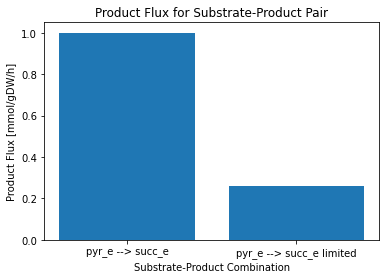

In [4]:
create_bar_chart(all_reactions, product_min)

## Databases
<hr>

### Exercise: 

Have a look into the listed Databases to find pathway from substrate to product and associated reactions. 
Chose one Database that seems to work best for your combination and look at the reactions to chose one you would like to test in the Experiment.

Put in the Metabolite ID of your substrate or product in 'None'. \
The Output gives you the KEGG_ID for your substrate and product which you can add to the KEGG link listed below.\
Copy the link for the TCA-Cycle or Clycolysis and just add the KEGG_ID into the search bar by adding +"KEGG_ID" without any spaces behind the link.

$\color{darkblue}{\text{Tipps:}}$
- Allgemeingültiges beschreiben
- danach individuelle Tips, was ist bei der datenbank besonders, worüdber könnte man stolpern.\
BiGG: Gib das verwendete model ein (*E. coli* core model), scrolle runter und öffne die Escher App. Du findest einen Überblick über alle metabolite und reaktionen im model (vorallem glycolyse und TCA Zyklus). Unter 'View' und dann 'Find' kannst du auch einzelne metabolite suchen und die anzeigen lassen. Durch scrollen mit dem curser über die Metabolite ID wird der name und weitere Informationen angezeigt, das gleiche, wenn du mit den curser über die reaktions ID fährst.

# Add different Databases!!!!

**Input:**
- Metabolite ID for substrate or product

Replace 'None' with the correct input.

In [5]:
# get KEGG ID for substrate 
print(model.metabolites.get_by_id('pyr_e').annotation['kegg.compound'])
# get KEGG ID for product
print(model.metabolites.get_by_id('succ_e').annotation['kegg.compound'])

# get BiGG ID for substrate
print(model.metabolites.get_by_id('pyr_e').annotation['bigg.metabolite'])
# get BiGG ID for product
print(model.metabolites.get_by_id('succ_e').annotation['bigg.metabolite'])

# get EcoCyc ID for substrate
print(model.metabolites.get_by_id('pyr_e').annotation['biocyc'])
# get EcoCyc ID for product
print(model.metabolites.get_by_id('succ_e').annotation['biocyc'])

# https://www.genome.jp/pathway/map00020 +KEGG_ID # KEGG TCA-cycle
# https://www.genome.jp/pathway/map00010 +KEGG_ID # KEGG Glycolysis
# BiGG/Escher Glycolysis
# BiGG/Escher TCA-cycle
# EcoCyc Glycolysis
# EcoCyc TCA-cycle
# https://chatgpt.com # ChatGPT

C00022
C00042
pyr
succ
META:PYRUVATE
META:SUC


The next two Code-cells might help to find the reaction ID you're looking for. By searching the metabolite and the reactions this metabolite participates in, you get information about the reaction name, reaction itself and the reaction ID. Consider Capital letters for the first letter. 

**Input:**
- first None: the metabolite name or any short form to find the metabolite ID
- second None: metabolite ID you extracted before to get information about the reaction

In [ ]:
search_met = 'Pyr'
model.metabolites.query(search_met, 'name') # --> no need, bacause met ID shown in selecetd_pair above?? 

[<Metabolite pyr_c at 0x7fe1a18422e0>, <Metabolite pyr_e at 0x7fe1a1842310>]

In [ ]:
met_reactions = 'pyr_e'
# list comprehension to show all reactions that contain the metabolite
[[reaction.id, reaction.name, reaction.reaction] for reaction in model.metabolites.get_by_id(met_reactions).reactions]

[['EX_pyr_e', 'Pyruvate exchange', 'pyr_e <=> '],
 ['PYRt2',
  'Pyruvate transport in via proton symport',
  'h_e + pyr_e <=> h_c + pyr_c']]

## Experiment
<hr>

**Input:** 
- any reaction ID of your choice. Consider using the code-cells above to find right reaction ID for this model.

Repalce 'None' with the correct input.

In [15]:
# reaction ID of choice 
target_reaction = 'CYTBD'

# add reaction ID to list of all reactions
all_reactions.append(target_reaction)
print(all_reactions)
print(target_reaction)

# optimize the model with reaction ID
model = optimize_reaction(model, target_reaction)
product_min.append(round(model.slim_optimize(),2) / product)

['pyr_e --> succ_e', 'pyr_e --> succ_e limited', 'CYTBD', 'CYTBD', 'CYTBD', 'CYTBD']
CYTBD


In [16]:
print(product_min)

[1.0, 0.26126126126126126, 0.4126126126126126, 0.5873873873873874, 0.8504504504504504, 1.0]


Here you can extend the bar chart to show the reaction ID you put in above and the product flux associated to that reaction. Compare the old product flux with the newly generated and decide if your chosen reaction ID is correct.\
If the reaction ID is correct try to extend the product flux even more, you may even be able to reach the old production rate.

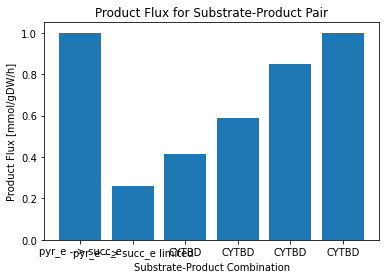

In [17]:
# check if reaction ID is correct and model is optimized
create_bar_chart(all_reactions, product_min)